In [ ]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

oposnk_accidents_french_roads_2005_2021_path = kagglehub.dataset_download('oposnk/accidents-french-roads-2005-2021')

print('Data source import complete.')


In [ ]:
import pandas as pd
import kagglehub


df = pd.read_csv("/kaggle/input/accidents-french-roads-2005-2021/accidents_french_roads_2005_2021.csv")


In [ ]:
# 🔧 Manipulation des données
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as msno


from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

#
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    ConfusionMatrixDisplay
)


from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline


import shap


import warnings
warnings.filterwarnings('ignore')

%matplotlib inline


## Quick Overview of the Dataset


In [ ]:
# Dimensions du dataset (lignes, colonnes)
print(f"Nombre de lignes : {df.shape[0]}")
print(f"Nombre de colonnes : {df.shape[1]}")

# Types de variables
df.info()

# Statistiques descriptives sur les variables numériques
df.describe()


Nombre de lignes : 2355812
Nombre de colonnes : 23
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2355812 entries, 0 to 2355811
Data columns (total 23 columns):
 #   Column         Dtype  
---  ------         -----  
 0   col            float64
 1   lum            int64  
 2   agg            int64  
 3   catr           float64
 4   circ           float64
 5   nbv            float64
 6   prof           float64
 7   plan           float64
 8   situ           float64
 9   catv           int64  
 10  obs            float64
 11  choc           float64
 12  manv           float64
 13  catu           int64  
 14  sexe           int64  
 15  grav           int64  
 16  age            float64
 17  month_sin      float64
 18  month_cos      float64
 19  DayOfWeek_sin  float64
 20  DayOfWeek_cos  float64
 21  TimeOfDay_sin  float64
 22  TimeOfDay_cos  float64
dtypes: float64(17), int64(6)
memory usage: 413.4 MB


,col,lum,agg,catr,circ,nbv,prof,plan,situ,catv,...,catu,sexe,grav,age,month_sin,month_cos,DayOfWeek_sin,DayOfWeek_cos,TimeOfDay_sin,TimeOfDay_cos
count,2.355812e+06,2.355812e+06,2.355812e+06,2.355812e+06,2.355812e+06,2.355812e+06,2.355812e+06,2.355812e+06,2.355812e+06,2.355812e+06,...,2.355812e+06,2.355812e+06,2.355812e+06,2.355812e+06,2.355812e+06,2.355812e+06,2.355812e+06,2.355812e+06,2.355812e+06,2.355812e+06
mean,3.898607e+00,1.898623e+00,1.650475e+00,3.305747e+00,1.982450e+00,3.202066e-02,1.171903e+00,1.223356e+00,1.197510e+00,1.144147e+01,...,1.338094e+00,1.325861e+00,2.009625e+00,6.867994e-01,-4.670165e-02,-2.088277e-02,6.136683e-02,-2.376607e-03,-2.842534e-01,-2.323842e-01
std,1.887166e+00,1.497668e+00,4.768202e-01,1.193102e+00,5.991531e-01,1.511258e-02,6.044706e-01,6.973094e-01,8.139528e-01,1.121176e+01,...,6.269037e-01,4.687011e-01,9.392153e-01,1.524267e-01,6.993558e-01,7.129409e-01,7.128296e-01,6.986436e-01,6.913659e-01,6.222630e-01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,...,1.000000e+00,-1.000000e+00,1.000000e+00,0.000000e+00,-1.000000e+00,-1.000000e+00,-9.749279e-01,-9.009689e-01,-1.000000e+00,-1.000000e+00
25%,3.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00,2.000000e+00,3.000000e-02,1.000000e+00,1.000000e+00,1.000000e+00,7.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,5.833333e-01,-8.660254e-01,-8.660254e-01,-7.818315e-01,-9.009689e-01,-9.238795e-01,-7.933533e-01
50%,3.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00,2.000000e+00,3.000000e-02,1.000000e+00,1.000000e+00,1.000000e+00,7.000000e+00,...,1.000000e+00,1.000000e+00,2.000000e+00,7.166667e-01,-2.449294e-16,-1.836970e-16,-2.449294e-16,-2.225209e-01,-5.372996e-01,-3.624380e-01
75%,6.000000e+00,3.000000e+00,2.000000e+00,4.000000e+00,2.000000e+00,3.000000e-02,1.000000e+00,1.000000e+00,1.000000e+00,7.000000e+00,...,2.000000e+00,2.000000e+00,3.000000e+00,8.083333e-01,5.000000e-01,5.000000e-01,7.818315e-01,6.234898e-01,3.214395e-01,2.461533e-01
max,7.000000e+00,5.000000e+00,2.000000e+00,9.000000e+00,4.000000e+00,1.000000e+00,4.000000e+00,4.000000e+00,8.000000e+00,9.900000e+01,...,4.000000e+00,2.000000e+00,4.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,9.749279e-01,1.000000e+00,1.000000e+00,1.000000e+00


## Variable Dictionary

| Variable         | Description                                             | Type        |
|------------------|---------------------------------------------------------|-------------|
| col              | Light conditions (encoded)                              | Categorical |
| lum              | Type of lighting (night, day, etc.)                     | Categorical |
| agg              | Urban area (yes/no)                                     | Categorical |
| catr             | Road category                                           | Categorical |
| circ             | Traffic regime                                          | Categorical |
| nbv              | Number of lanes (normalized)                            | Numerical   |
| prof             | Road profile (flat, slope, curve...)                    | Categorical |
| plan             | Road layout                                             | Categorical |
| situ             | Accident situation (roadworks, parking, etc.)           | Categorical |
| catv             | Vehicle category                                        | Categorical |
| obs              | Fixed obstacle                                          | Categorical |
| choc             | Type of impact                                          | Categorical |
| manv             | Maneuver before the accident                            | Categorical |
| catu             | User category                                           | Categorical |
| sexe             | User’s gender                                           | Categorical |
| grav             | Accident severity (target variable)                     | Target      |
| age              | User’s age (normalized)                                 | Numerical   |
| month_sin/cos    | Month of the year (cyclic encoding)                     | Numerical   |
| DayOfWeek_sin/cos| Day of the week (cyclic encoding)                       | Numerical   |
| TimeOfDay_sin/cos| Time of day (cyclic encoding)                           | Numerical   |


## Target Variable Meaning

| Value | Meaning                     |
|-------|------------------------------|
| 1     | Unharmed                     |
| 2     | Killed                       |
| 3     | Injured and hospitalized     |
| 4     | Slightly injured             |


👉 Distribution des classes (valeurs absolues) :
grav
1    963671
2    469956
3    858024
4     64161
Name: count, dtype: int64


👉 Distribution des classes (en %) :
grav
1    40.91
2    19.95
3    36.42
4     2.72
Name: proportion, dtype: float64




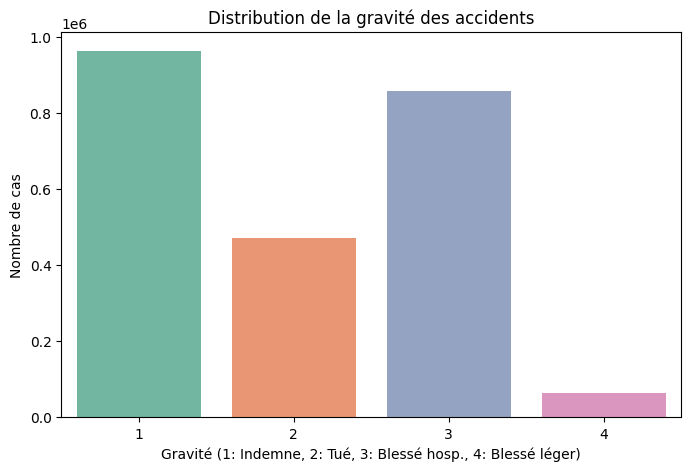

In [ ]:
# 1. Distribution absolue
print("👉 Distribution des classes (valeurs absolues) :")
print(df['grav'].value_counts().sort_index())
print("\n")

# 2. Distribution en pourcentage
print("👉 Distribution des classes (en %) :")
print(round(df['grav'].value_counts(normalize=True).sort_index() * 100, 2))
print("\n")

# 3. Visualisation
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='grav', palette='Set2')
plt.title('Distribution de la gravité des accidents')
plt.xlabel('Gravité (1: Indemne, 2: Tué, 3: Blessé hosp., 4: Blessé léger)')
plt.ylabel('Nombre de cas')
plt.show()


👉 Nouvelle distribution après suppression de la classe 4 :
grav
1    963671
2    469956
3    858024
Name: count, dtype: int64

Pourcentage :
grav
1    42.05
2    20.51
3    37.44
Name: proportion, dtype: float64


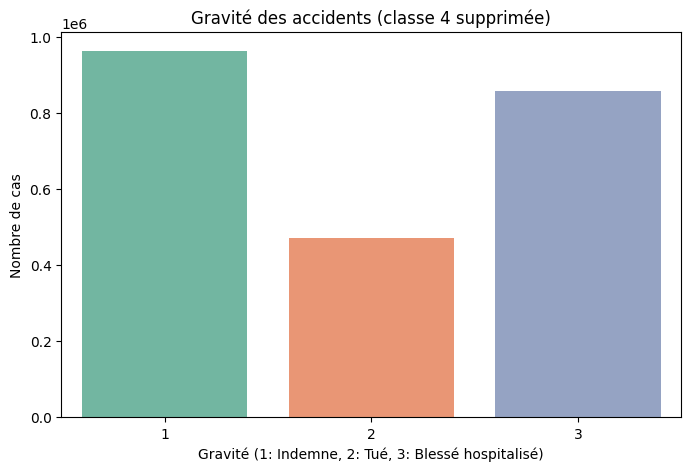

In [ ]:
# On garde uniquement les classes 1, 2 et 3
df = df[df['grav'].isin([1, 2, 3])].copy()
print("👉 Nouvelle distribution après suppression de la classe 4 :")
print(df['grav'].value_counts().sort_index())
print("\nPourcentage :")
print(round(df['grav'].value_counts(normalize=True).sort_index() * 100, 2))
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='grav', palette='Set2')
plt.title('Gravité des accidents (classe 4 supprimée)')
plt.xlabel('Gravité (1: Indemne, 2: Tué, 3: Blessé hospitalisé)')
plt.ylabel('Nombre de cas')
plt.show()


## Exploration des variables

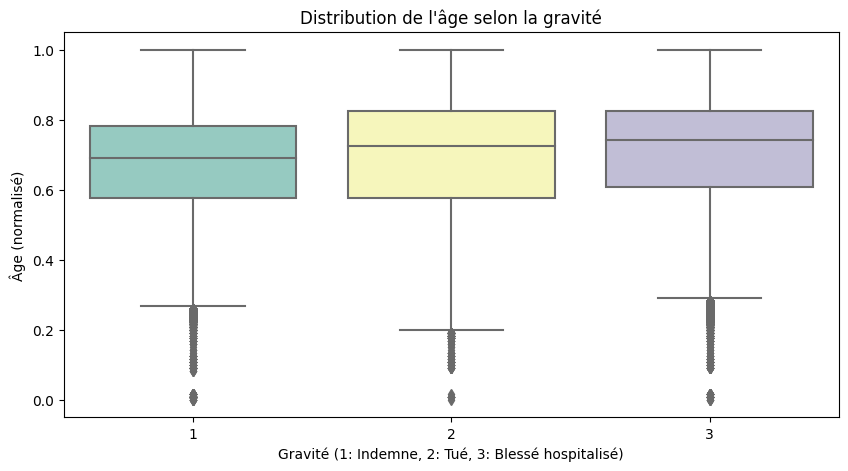

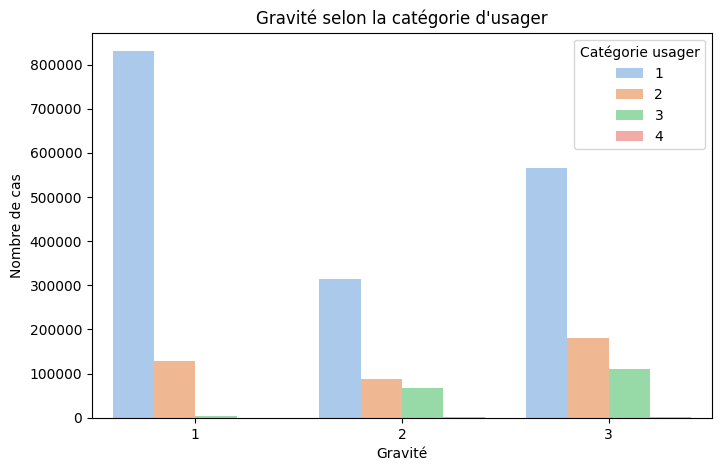

Répartition catu:
catu
1    1710582
2     396853
3     181040
4       3176
Name: count, dtype: int64


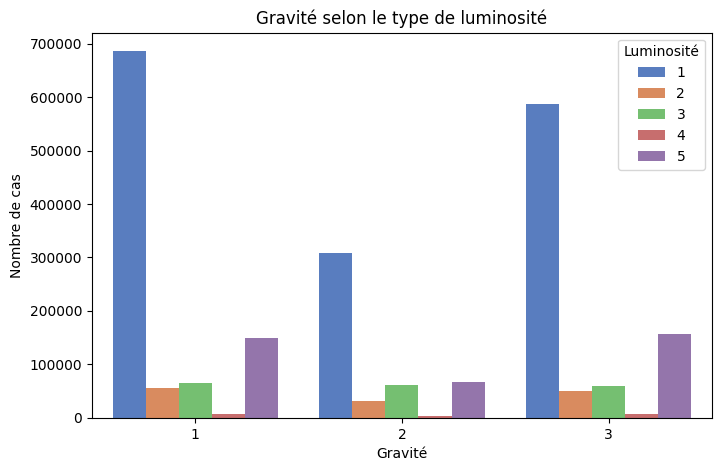

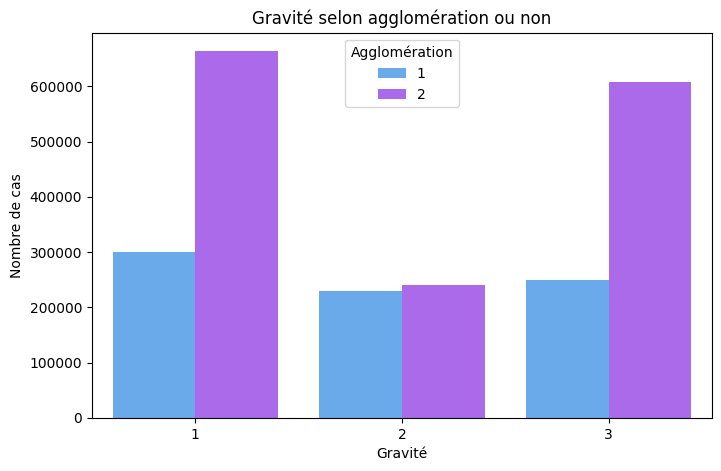

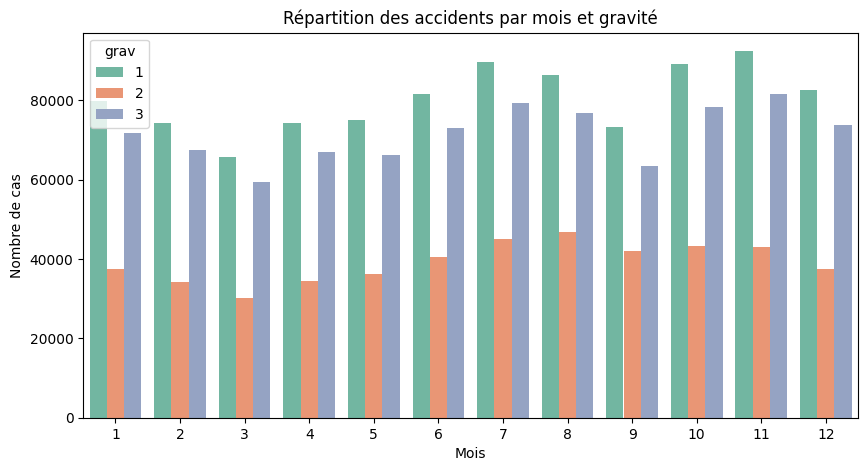

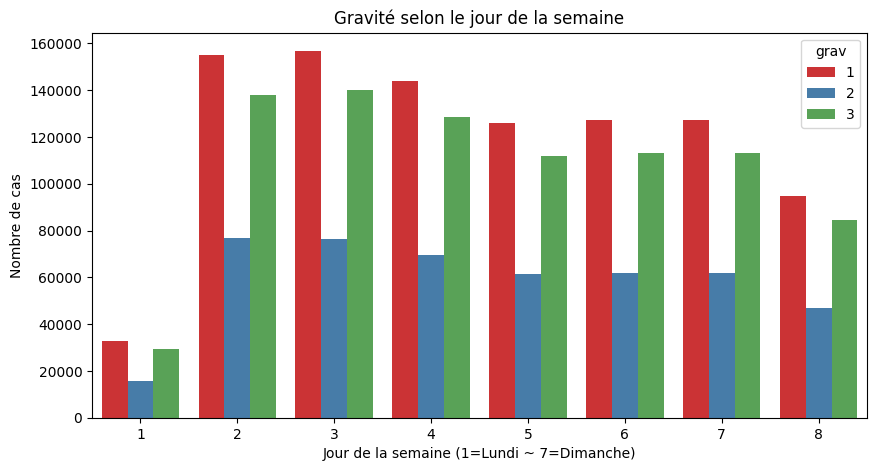

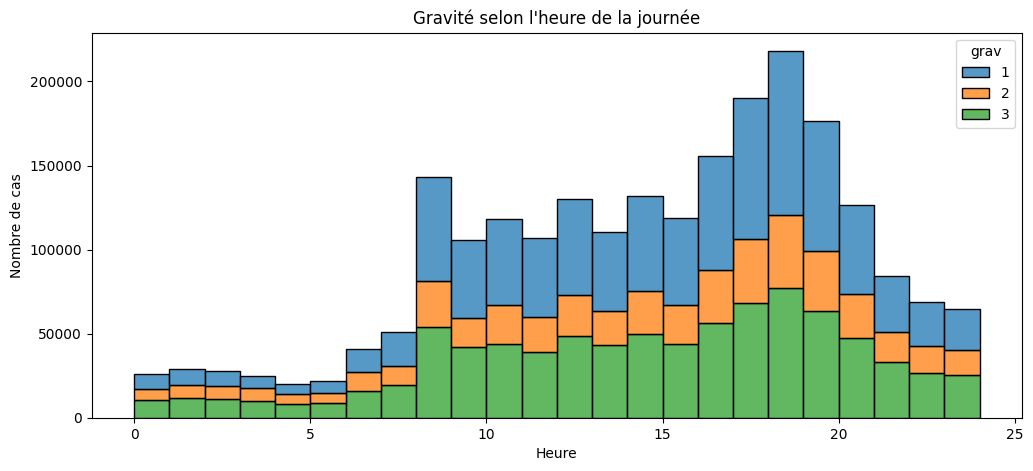

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='grav', y='age', palette='Set3')
plt.title("Distribution de l'âge selon la gravité")
plt.xlabel("Gravité (1: Indemne, 2: Tué, 3: Blessé hospitalisé)")
plt.ylabel("Âge (normalisé)")
plt.show()


plt.figure(figsize=(8,5))
sns.countplot(data=df, x='grav', hue='catu', palette='pastel')
plt.title("Gravité selon la catégorie d'usager")
plt.xlabel("Gravité")
plt.ylabel("Nombre de cas")
plt.legend(title="Catégorie usager")
plt.show()

print("Répartition catu:")
print(df['catu'].value_counts())

plt.figure(figsize=(8,5))
sns.countplot(data=df, x='grav', hue='lum', palette='muted')
plt.title("Gravité selon le type de luminosité")
plt.xlabel("Gravité")
plt.ylabel("Nombre de cas")
plt.legend(title="Luminosité")
plt.show()

plt.figure(figsize=(8,5))
sns.countplot(data=df, x='grav', hue='agg', palette='cool')
plt.title("Gravité selon agglomération ou non")
plt.xlabel("Gravité")
plt.ylabel("Nombre de cas")
plt.legend(title="Agglomération")
plt.show()

# Récupérer le mois réel en radians puis en mois (1 à 12)
df['month_angle'] = np.arctan2(df['month_sin'], df['month_cos'])
df['month'] = ((df['month_angle'] + 2 * np.pi) % (2 * np.pi)) * 12 / (2 * np.pi) + 1
df['month'] = df['month'].round().astype(int)

plt.figure(figsize=(10,5))
sns.countplot(data=df, x='month', hue='grav', palette='Set2')
plt.title("Répartition des accidents par mois et gravité")
plt.xlabel("Mois")
plt.ylabel("Nombre de cas")
plt.show()


df['day_angle'] = np.arctan2(df['DayOfWeek_sin'], df['DayOfWeek_cos'])
df['day'] = ((df['day_angle'] + 2 * np.pi) % (2 * np.pi)) * 7 / (2 * np.pi) + 1
df['day'] = df['day'].round().astype(int)

plt.figure(figsize=(10,5))
sns.countplot(data=df, x='day', hue='grav', palette='Set1')
plt.title("Gravité selon le jour de la semaine")
plt.xlabel("Jour de la semaine (1=Lundi ~ 7=Dimanche)")
plt.ylabel("Nombre de cas")
plt.show()


df['hour_angle'] = np.arctan2(df['TimeOfDay_sin'], df['TimeOfDay_cos'])
df['hour'] = ((df['hour_angle'] + 2 * np.pi) % (2 * np.pi)) * 24 / (2 * np.pi)
df['hour'] = df['hour'].round().astype(int)

plt.figure(figsize=(12,5))
sns.histplot(data=df, x='hour', hue='grav', multiple='stack', bins=24, palette='tab10')
plt.title("Gravité selon l'heure de la journée")
plt.xlabel("Heure")
plt.ylabel("Nombre de cas")
plt.show()



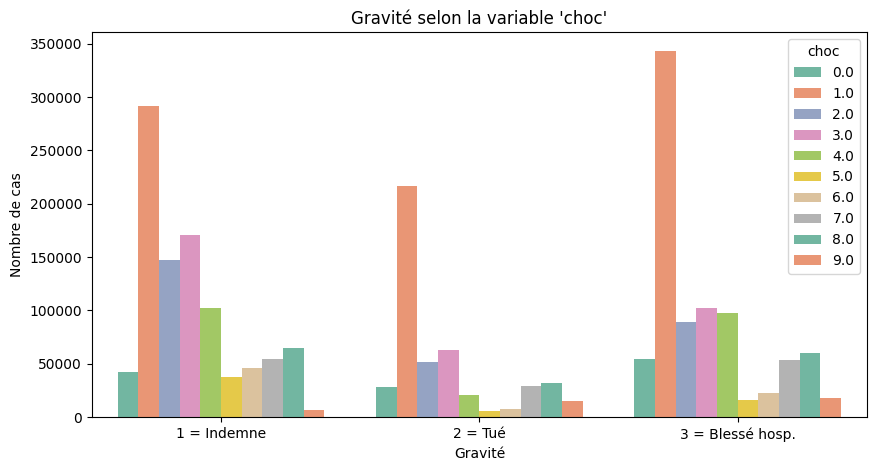

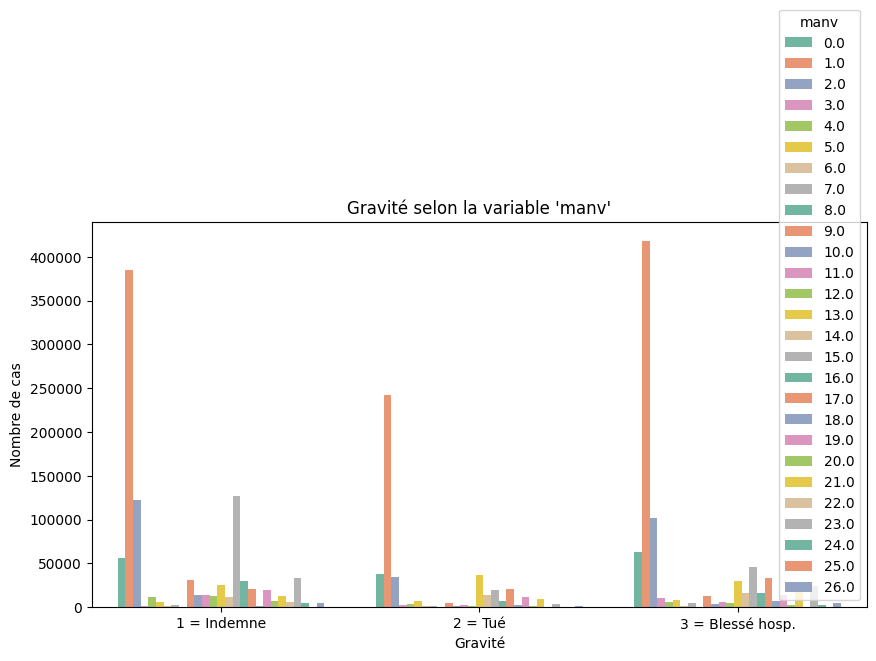

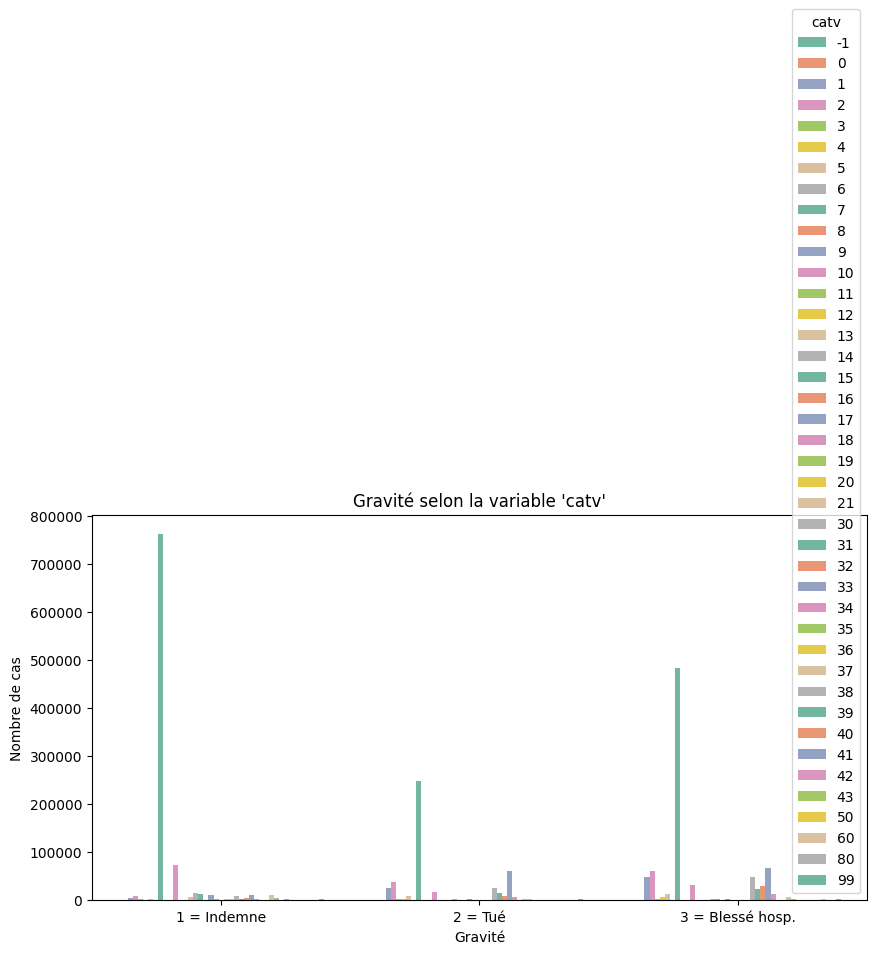

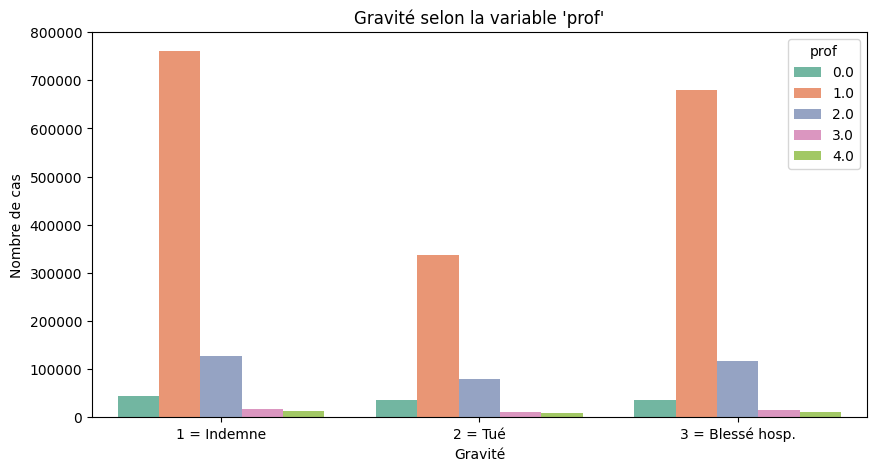

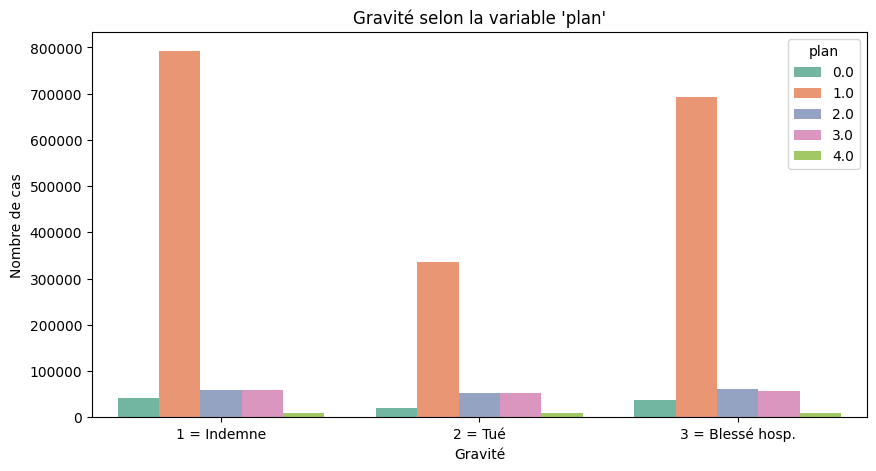

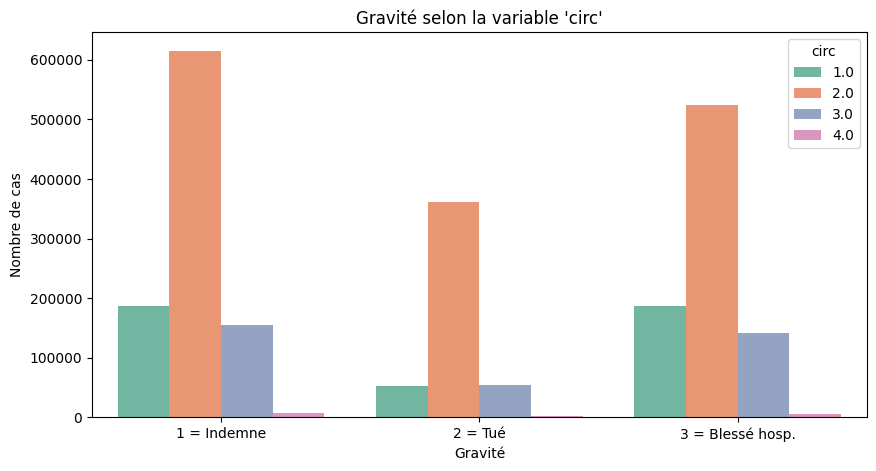

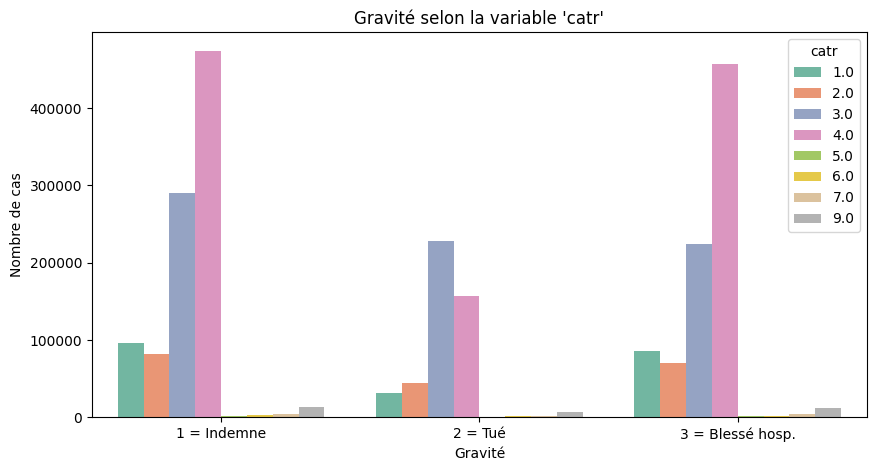

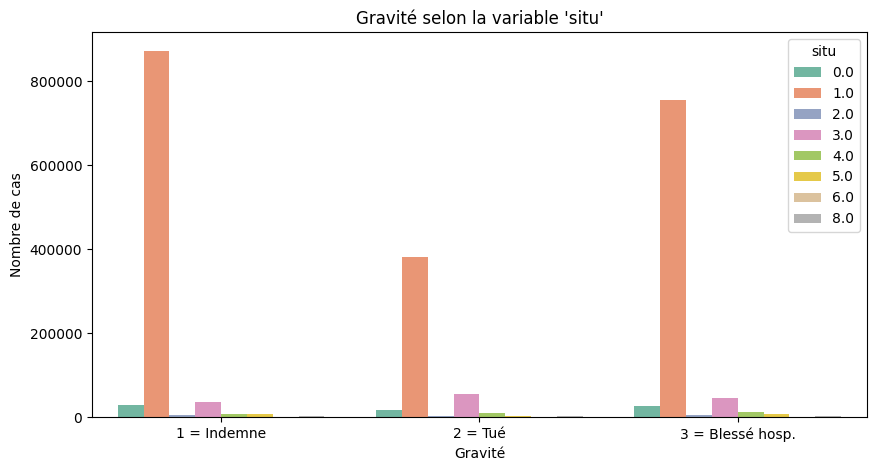

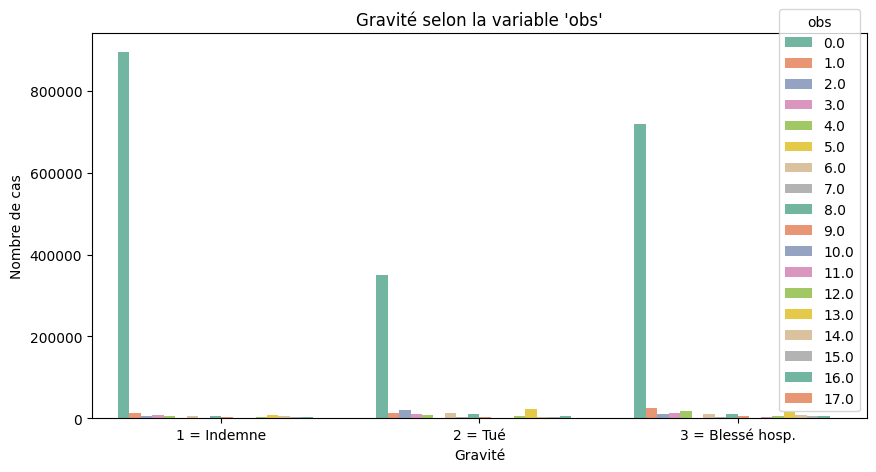

In [ ]:
def plot_variable_vs_gravity(var):
    plt.figure(figsize=(10,5))
    sns.countplot(data=df, x='grav', hue=var, palette='Set2')
    plt.title(f"Gravité selon la variable '{var}'")
    plt.xlabel("Gravité")
    plt.ylabel("Nombre de cas")
    plt.legend(title=var)
    plt.xticks([0, 1, 2], ["1 = Indemne", "2 = Tué", "3 = Blessé hosp."])
    plt.show()


plot_variable_vs_gravity('choc')
plot_variable_vs_gravity('manv')
plot_variable_vs_gravity('catv')
plot_variable_vs_gravity('prof')
plot_variable_vs_gravity('plan')
plot_variable_vs_gravity('circ')
plot_variable_vs_gravity('catr')
plot_variable_vs_gravity('situ')
plot_variable_vs_gravity('obs')


In [ ]:
# Étape 1 : Recalage des classes
df['grav_encoded'] = df['grav'].map({1: 0, 2: 1, 3: 2})

# Étape 2 : Séparation X / y
X = df.drop(columns=['grav', 'grav_encoded'])
y = df['grav_encoded']

# Étape 3 : Split en 70% Train + 30% Temporaire (val + test)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# Étape 4 : Split du temporaire en 15% Validation + 15% Test
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42
)

# Vérification des tailles
print(f"Train : {X_train.shape}")
print(f"Validation : {X_val.shape}")
print(f"Test : {X_test.shape}")


Train : (1604155, 28)
Validation : (343748, 28)
Test : (343748, 28)


Évaluation sur jeu de validation (baseline) :
              precision    recall  f1-score   support

     Indemne       0.73      0.83      0.77    144551
         Tué       0.59      0.42      0.49     70494
Blessé hosp.       0.63      0.63      0.63    128703

    accuracy                           0.67    343748
   macro avg       0.65      0.62      0.63    343748
weighted avg       0.66      0.67      0.66    343748



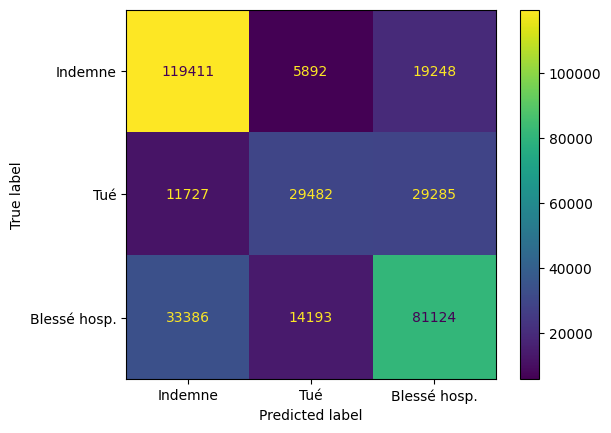

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Modèle de base
xgb_clf = XGBClassifier(
    objective='multi:softmax',
    num_class=3,
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42
)

# Entraînement sur le jeu d'entraînement uniquement
xgb_clf.fit(X_train, y_train)

# Évaluation sur le jeu de validation
y_val_pred = xgb_clf.predict(X_val)

print("Évaluation sur jeu de validation (baseline) :")
print(classification_report(y_val, y_val_pred, target_names=["Indemne", "Tué", "Blessé hosp."]))
ConfusionMatrixDisplay.from_predictions(y_val, y_val_pred, display_labels=["Indemne", "Tué", "Blessé hosp."])


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Évaluation sur jeu de validation après optimisation :
              precision    recall  f1-score   support

     Indemne       0.73      0.83      0.78    144551
         Tué       0.60      0.43      0.50     70494
Blessé hosp.       0.63      0.63      0.63    128703

    accuracy                           0.67    343748
   macro avg       0.65      0.63      0.64    343748
weighted avg       0.67      0.67      0.67    343748



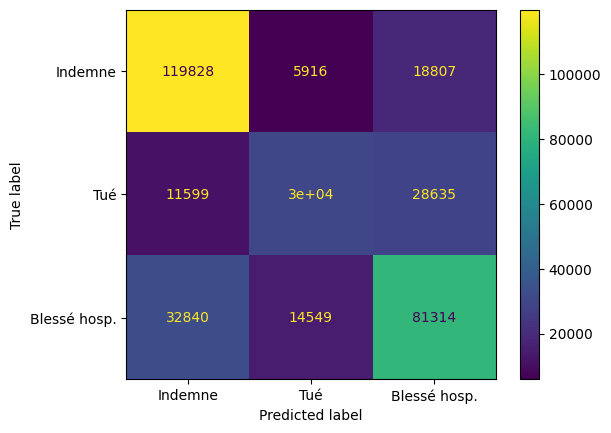

In [ ]:


# Scorer personnalisé : recall sur la classe 1 (Tué)
recall_tue = make_scorer(recall_score, average=None, labels=[0, 1, 2], pos_label=1)

# Grille d’hyperparamètres à tester
param_distrib = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 1, 5]
}

# Initialisation du modèle XGBoost
xgb = XGBClassifier(
    objective='multi:softmax',
    num_class=3,
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42
)

# RandomizedSearchCV pour optimiser le rappel de la classe "Tué"
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_distrib,
    n_iter=10,
    scoring=make_scorer(recall_score, average='macro'),  # on peut remplacer ici par 'recall_tue' si ciblé
    cv=3,
    verbose=1,
    n_jobs=-1
)

# Entraînement sur X_train, validation via CV
random_search.fit(X_train, y_train)

# Récupération du meilleur modèle
best_xgb = random_search.best_estimator_

# Évaluation sur jeu de validation
y_val_pred = best_xgb.predict(X_val)
print("Évaluation sur jeu de validation après optimisation :")
print(classification_report(y_val, y_val_pred, target_names=["Indemne", "Tué", "Blessé hosp."]))
ConfusionMatrixDisplay.from_predictions(y_val, y_val_pred, display_labels=["Indemne", "Tué", "Blessé hosp."])


In [ ]:
joblib.dump(best_xgb, 'xgb_model.pkl')
from IPython.display import FileLink
FileLink('xgb_model.pkl')


NameError: name 'joblib' is not defined

Train: (1604155, 28), Validation: (343748, 28), Test: (343748, 28)
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Meilleurs hyperparamètres : {'clf__subsample': 0.6, 'clf__n_estimators': 100, 'clf__max_depth': 3, 'clf__learning_rate': 0.05, 'clf__gamma': 1, 'clf__colsample_bytree': 1.0}
Meilleur score (rappel sur 'Tué') : 0.4831762295097282
Évaluation sur le jeu de validation après optimisation :
              precision    recall  f1-score   support

     Indemne       0.70      0.80      0.75    144551
         Tué       0.47      0.49      0.48     70494
Blessé hosp.       0.63      0.52      0.57    128703

    accuracy                           0.63    343748
   macro avg       0.60      0.60      0.60    343748
weighted avg       0.63      0.63      0.63    343748



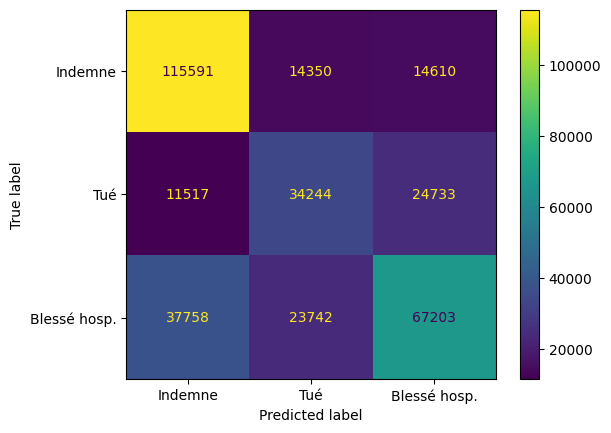

In [ ]:
from xgboost import XGBClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, make_scorer, recall_score
from imblearn.over_sampling import SMOTE


# --- Préparation des données ---
# Recalage de la variable cible : 1->0, 2->1, 3->2
df['grav_encoded'] = df['grav'].map({1: 0, 2: 1, 3: 2})

# Séparation X / y
X = df.drop(columns=['grav', 'grav_encoded'])
y = df['grav_encoded']

# Séparation des jeux de données : 70% train, 15% validation, 15% test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

print(f"Train: {X_train.shape}, Validation: {X_val.shape}, Test: {X_test.shape}")

# --- Définition du scorer personnalisé ---
# Cette fonction retourne le rappel pour la classe "Tué" (encodée en 1)
def recall_tue_only(y_true, y_pred):
    # On calcule le rappel pour chaque classe, puis on retourne celui de l'index 1 (classe Tué)
    recalls = recall_score(y_true, y_pred, average=None)
    return recalls[1]

scorer_tue = make_scorer(recall_tue_only)

# --- Construction du pipeline ---
# Le pipeline inclut SMOTE pour suréchantillonner la classe minoritaire et le classifieur XGBoost.
pipeline = Pipeline(steps=[
    ('smote', SMOTE(random_state=42)),
    ('clf', XGBClassifier(
        objective='multi:softmax',
        num_class=3,
        use_label_encoder=False,
        eval_metric='mlogloss',
        random_state=42
    ))
])

# --- Grille d'hyperparamètres à explorer ---
param_distrib = {
    'clf__n_estimators': [100, 200, 300],
    'clf__max_depth': [3, 5, 7, 10],
    'clf__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'clf__subsample': [0.6, 0.8, 1.0],
    'clf__colsample_bytree': [0.6, 0.8, 1.0],
    'clf__gamma': [0, 1, 5]
}

# --- Mise en place de RandomizedSearchCV ---
# Nous passons en plus des paramètres de fit pour utiliser l'early stopping.
fit_params = {
    'clf__eval_set': [(X_val, y_val)],
    'clf__early_stopping_rounds': 10,
    'clf__verbose': False
}

random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_distrib,
    n_iter=10,
    scoring=scorer_tue,  # Optimiser le rappel pour la classe "Tué"
    cv=3,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# --- Entraînement via RandomizedSearchCV ---
random_search.fit(X_train, y_train, **fit_params)

# Meilleur modèle obtenu
best_pipeline = random_search.best_estimator_
print("Meilleurs hyperparamètres :", random_search.best_params_)
print("Meilleur score (rappel sur 'Tué') :", random_search.best_score_)

# --- Évaluation sur le jeu de validation ---
y_val_pred = best_pipeline.predict(X_val)

print("Évaluation sur le jeu de validation après optimisation :")
print(classification_report(y_val, y_val_pred, target_names=["Indemne", "Tué", "Blessé hosp."]))
ConfusionMatrixDisplay.from_predictions(y_val, y_val_pred, display_labels=["Indemne", "Tué", "Blessé hosp."])


In [ ]:
import joblib
from IPython.display import FileLink
# Sauvegarde du pipeline complet (SMOTE + XGBoost) dans un fichier
joblib.dump(best_pipeline, 'xgb_pipeline_optimise.pkl')
FileLink('xgb_pipeline_optimise.pkl')

/kaggle/working/xgb_pipeline_optimise.pkl

Évaluation finale sur le jeu de test :
              precision    recall  f1-score   support

     Indemne       0.70      0.80      0.75    144551
         Tué       0.47      0.48      0.48     70493
Blessé hosp.       0.63      0.52      0.57    128704

    accuracy                           0.63    343748
   macro avg       0.60      0.60      0.60    343748
weighted avg       0.63      0.63      0.63    343748



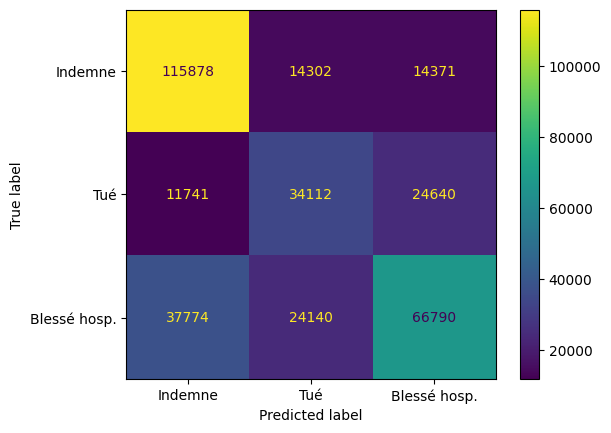

In [ ]:
# Évaluation finale sur le jeu de test
y_test_pred = best_pipeline.predict(X_test)

print("Évaluation finale sur le jeu de test :")
print(classification_report(y_test, y_test_pred, target_names=["Indemne", "Tué", "Blessé hosp."]))
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred, display_labels=["Indemne", "Tué", "Blessé hosp."])


<Figure size 1200x600 with 0 Axes>

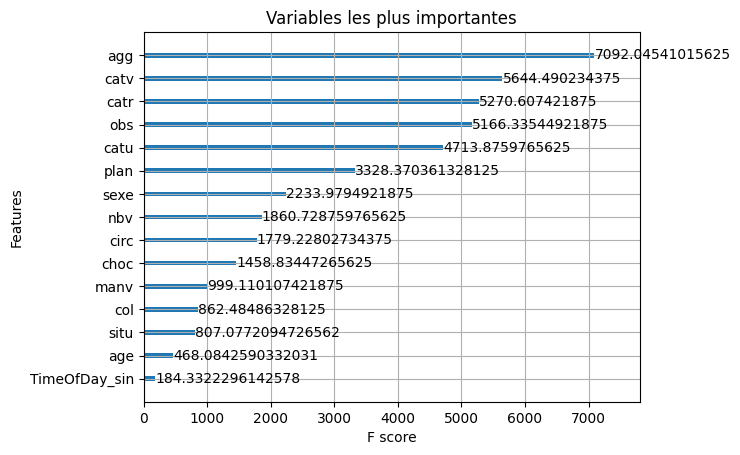

In [ ]:
# Extraire le classifieur XGBoost du pipeline
xgb_model = best_pipeline.named_steps['clf']

import matplotlib.pyplot as plt
from xgboost import plot_importance

plt.figure(figsize=(12, 6))
plot_importance(xgb_model, max_num_features=15, importance_type='gain')
plt.title("Variables les plus importantes")
plt.show()


## Réentraînement du modèle avec les 10 premières variables

Train: (1604155, 10), Validation: (343748, 10), Test: (343748, 10)
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Évaluation (10 variables) sur le jeu de validation :
              precision    recall  f1-score   support

     Indemne       0.75      0.74      0.75    144551
         Tué       0.46      0.58      0.51     70494
Blessé hosp.       0.63      0.53      0.58    128703

    accuracy                           0.63    343748
   macro avg       0.61      0.62      0.61    343748
weighted avg       0.64      0.63      0.63    343748



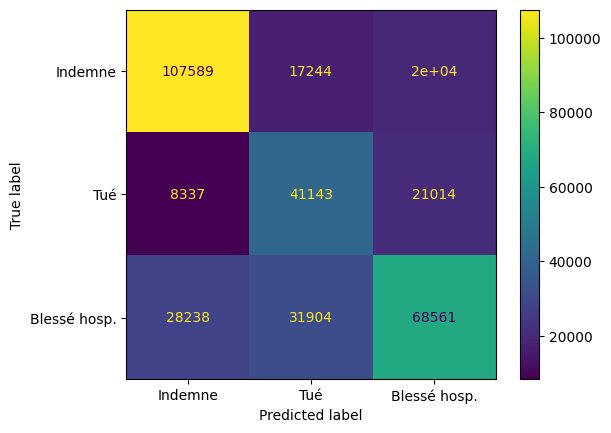

In [ ]:
# --- Sélection des colonnes importantes ---
top_features = ['agg', 'catv', 'catr', 'obs', 'catu', 'plan', 'sexe', 'nbv', 'circ', 'choc']

# Création d’un dataset réduit
X = df[top_features].copy()
y = df['grav_encoded']  # On utilise la colonne déjà recodée (0: indemne, 1: tué, 2: blessé hosp.)

# Séparation train / val / test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

print(f"Train: {X_train.shape}, Validation: {X_val.shape}, Test: {X_test.shape}")

# --- Scorer personnalisé pour le rappel sur "Tué" (classe 1 encodée) ---
def recall_tue_only(y_true, y_pred):
    recalls = recall_score(y_true, y_pred, average=None)
    return recalls[1]

scorer_tue = make_scorer(recall_tue_only)

# --- Pipeline SMOTE + XGBoost ---
pipeline = Pipeline(steps=[
    ('smote', SMOTE(random_state=42)),
    ('clf', XGBClassifier(
        objective='multi:softmax',
        num_class=3,
        use_label_encoder=False,
        eval_metric='mlogloss',
        random_state=42
    ))
])

# --- Grille d’hyperparamètres à explorer ---
param_distrib = {
    'clf__n_estimators': [100, 200, 300],
    'clf__max_depth': [3, 5, 7, 10],
    'clf__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'clf__subsample': [0.6, 0.8, 1.0],
    'clf__colsample_bytree': [0.6, 0.8, 1.0],
    'clf__gamma': [0, 1, 5]
}

# --- Paramètres pour early stopping ---
fit_params = {
    'clf__eval_set': [(X_val, y_val)],
    'clf__early_stopping_rounds': 10,
    'clf__verbose': False
}

# --- RandomizedSearchCV ---
random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_distrib,
    n_iter=10,
    scoring=scorer_tue,
    cv=3,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# --- Entraînement ---
random_search.fit(X_train, y_train, **fit_params)

# Meilleur pipeline
best_pipeline_reduced = random_search.best_estimator_

# --- Évaluation sur validation ---
y_val_pred = best_pipeline_reduced.predict(X_val)

print("Évaluation (10 variables) sur le jeu de validation :")
print(classification_report(y_val, y_val_pred, target_names=["Indemne", "Tué", "Blessé hosp."]))
ConfusionMatrixDisplay.from_predictions(y_val, y_val_pred, display_labels=["Indemne", "Tué", "Blessé hosp."])


In [ ]:
# Sauvegarde du pipeline entraîné (SMOTE + XGBoost réduit à 10 variables)
joblib.dump(best_pipeline_reduced, 'xgb_pipeline_top10.pkl')

# Lien de téléchargement du fichier dans le notebook
FileLink('xgb_pipeline_top10.pkl')

/kaggle/working/xgb_pipeline_top10.pkl